In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [140]:
df = pd.read_csv("data/AB_NYC_2019.csv")

Removing unnecessary columns ->

In [141]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [142]:
df = df[['id', 'name', 'neighbourhood_group',
       'neighbourhood', 'room_type', 'price',
       'number_of_reviews','availability_365']]

In [143]:
df.head()

,id,name,neighbourhood_group,neighbourhood,room_type,price,number_of_reviews,availability_365
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,Private room,149,9,365
1,2595,Skylit Midtown Castle,Manhattan,Midtown,Entire home/apt,225,45,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,Private room,150,0,365
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,Entire home/apt,89,270,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,Entire home/apt,80,9,0


Dropping all duplicate columns and null values

In [144]:
df = df.dropna()
print(df["price"].value_counts())
print(df["id"].value_counts())



100    2050
150    2046
50     1533
60     1458
200    1400
       ... 
780       1
386       1
888       1
483       1
338       1
Name: price, Length: 674, dtype: int64
2539        1
25588085    1
25572892    1
25580113    1
25580283    1
           ..
13125243    1
13125552    1
13126457    1
13126582    1
36487245    1
Name: id, Length: 48879, dtype: int64


Some AirBNBs will have the same name like for example "Brooklyn Apartment", but that is ok because they are different listings.

In [145]:
df.duplicated().sum()

0

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48879 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   48879 non-null  int64 
 1   name                 48879 non-null  object
 2   neighbourhood_group  48879 non-null  object
 3   neighbourhood        48879 non-null  object
 4   room_type            48879 non-null  object
 5   price                48879 non-null  int64 
 6   number_of_reviews    48879 non-null  int64 
 7   availability_365     48879 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 3.4+ MB


1. What are the average AirBNB prices of the most popular neighborhoods in New York City?

<Axes: title={'center': 'Neighborhood vs Price'}, xlabel='neighbourhood', ylabel='price'>

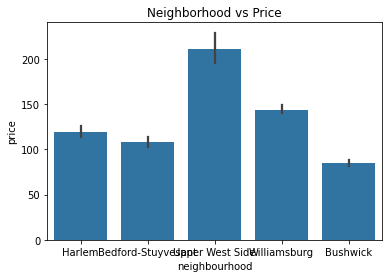

In [147]:
plt.title("Neighborhood vs Price")
topfive = ["Williamsburg", "Bedford-Stuyvesant", "Harlem", "Bushwick", "Upper West Side"]
df_limited = df.loc[df["neighbourhood"].isin(topfive)]
sns.barplot(data=df_limited, x = "neighbourhood", y = "price")


From this we can determine that the most expensive neighborhood for NYC's AirBNBs is the Upper West Side

2. Is there a relationship between the type of AirBNB and the price?

In [148]:
df["room_type"].value_counts()

Entire home/apt    25402
Private room       22318
Shared room         1159
Name: room_type, dtype: int64

<Axes: title={'center': 'Room Type vs Price'}, xlabel='room_type', ylabel='price'>

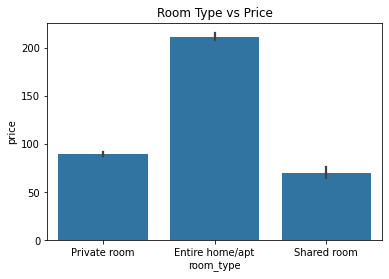

In [149]:
plt.title("Room Type vs Price")
roomtyp = ["Entire home/apt", "Private room", "Shared room"]
df_roomtyp = df.loc[df["room_type"].isin(roomtyp)]
sns.barplot(data=df_roomtyp, x = "room_type", y = "price")

The conclusion drawn from this graph, in hindsight, makes a lot of sense. The home rentals should obviously be most expensive, followed by a private space, and lastly a non-private space.

3. Is there a correlation between the availability of the room and the amount of reviews that they recieve?

In [150]:
X_train = df[["availability_365"]]
y_train = df[["number_of_reviews"]]
model = LinearRegression()

model = model.fit(X_train, y_train)
print(model.coef_, model.intercept_)

[[0.05823655]] [16.71276333]


In [151]:
y_pred = model.predict(X_train)

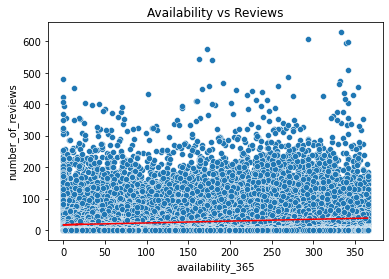

In [152]:
plt.title("Availability vs Reviews")
sns.scatterplot(data=df,x="availability_365",y="number_of_reviews")
plt.plot(X_train, y_pred, color="r")

This is quite hard to see because there are so many data points that I did not group. However, I found this statistic very interesting. The slope of the line is only 0.05. I figured that the amount of time the AirBNB was open would affect how many reviews each one got. What I discovered though was that the correlation between these two was very close to 0.

Conclusion: One thing that I would use a machine learning model for would be to take the user's past AirBNB experiences and what they rated them, and use the New York City AirBNB data to select the price range and experience that best fits the user.